In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pandas as pd

In [2]:
load_train_data='../input/foodcnn/monan'

In [3]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255,validation_split=0.2,rotation_range=10, 
                            zoom_range = 0.1,  
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             brightness_range=(0.9, 1.1))

In [4]:
train_data=train.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=100,
    class_mode='categorical',
    subset = 'training'
   )
validation_set=validation.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=100,
    class_mode='categorical',
    subset = 'validation'
    )

Found 5706 images belonging to 10 classes.
Found 1137 images belonging to 10 classes.


In [5]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'Banh chung': 0, 'Banh khot': 1, 'Banh mi': 2, 'Banh trang nuong': 3, 'Banh xeo': 4, 'Bun dau mam tom': 5, 'Ca kho to': 6, 'Goi cuon': 7, 'Nem chua': 8, 'Xoi xeo': 9}
{'Banh chung': 0, 'Banh khot': 1, 'Banh mi': 2, 'Banh trang nuong': 3, 'Banh xeo': 4, 'Bun dau mam tom': 5, 'Ca kho to': 6, 'Goi cuon': 7, 'Nem chua': 8, 'Xoi xeo': 9}


In [11]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
history=model.fit(train_data,batch_size=100,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
58/58 [==============================] - 125s 2s/step - loss: 3.8813 - accuracy: 0.1973 - val_loss: 2.1231 - val_accuracy: 0.2982
Epoch 2/50
58/58 [==============================] - 123s 2s/step - loss: 2.0705 - accuracy: 0.2862 - val_loss: 2.1117 - val_accuracy: 0.3439
Epoch 3/50
58/58 [==============================] - 124s 2s/step - loss: 1.9081 - accuracy: 0.3530 - val_loss: 1.9621 - val_accuracy: 0.4389
Epoch 4/50
58/58 [==============================] - 124s 2s/step - loss: 1.7617 - accuracy: 0.4059 - val_loss: 1.7645 - val_accuracy: 0.4644
Epoch 5/50
58/58 [==============================] - 123s 2s/step - loss: 1.6623 - accuracy: 0.4390 - val_loss: 1.7077 - val_accuracy: 0.4582
Epoch 6/50
58/58 [==============================] - 125s 2s/step - loss: 1.6469 - accuracy: 0.4427 - val_loss: 1.6659 - val_accuracy: 0.5207
Epoch 7/50
58/58 [==============================] - 124s 2s/step - loss: 1.4747 - accuracy: 0.5035 - val_loss: 1.6093 - val_accuracy: 0.5435
Epoch 8/50
58

In [12]:
score=model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra của mô hình là:',score[0])
print('Độ chính xác kiểm tra của môn hình là:',score[1])

Sai số kiểm tra của mô hình là: 1.0596123933792114
Độ chính xác kiểm tra của môn hình là: 0.6569920778274536


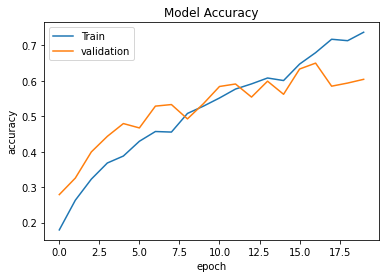

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc = 'upper left')
plt.show()

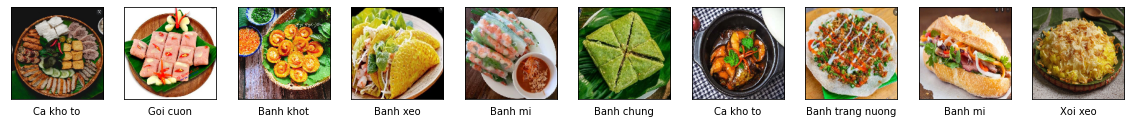

In [13]:
food={0:'Banh chung',
       1:'Banh khot',
       2:'Banh mi',
       3:'Banh trang nuong',
       4:'Banh xeo',
       5:'Bun dau mam tom',
       6:'Ca kho to',
       7:'Goi cuon',
       8:'Nem chua',
       9:'Xoi xeo'}
import os
filenames=os.listdir("../input/foodtest/foodtest")
df=pd.DataFrame({'filename':filenames})
url='../input/foodtest/foodtest/'+df['filename']

plt.figure(figsize=(20,20))
for i in range(df.shape[0]):
  plt.subplot(10,10,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  img=load_img(url[i],target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.reshape(1,150,150,3)
  img=img/255.0
  img_pred = model.predict(img)
  plt.xlabel(food[np.argmax(img_pred)])
plt.show()

In [14]:
model.save('./foodcnn2.h5')